(150, 4)
(150,)
No. of Classes: 3


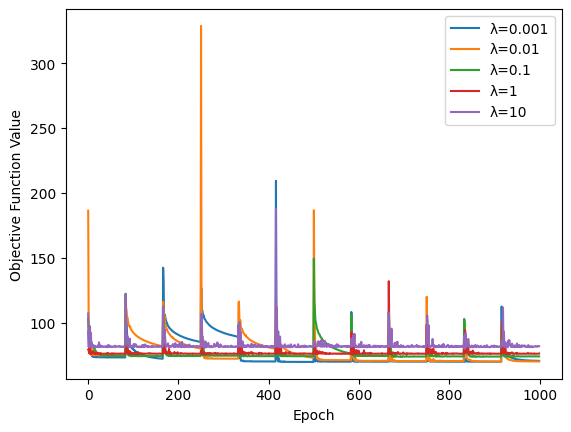

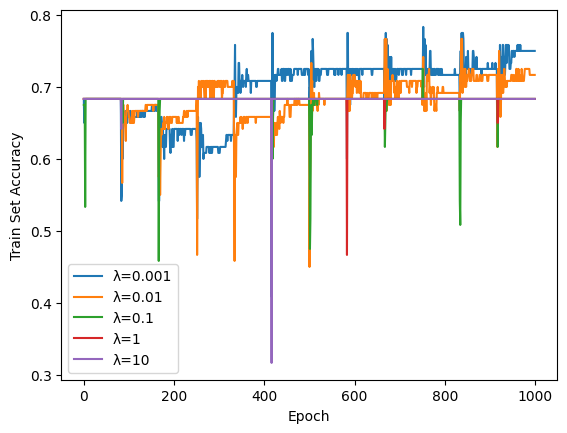

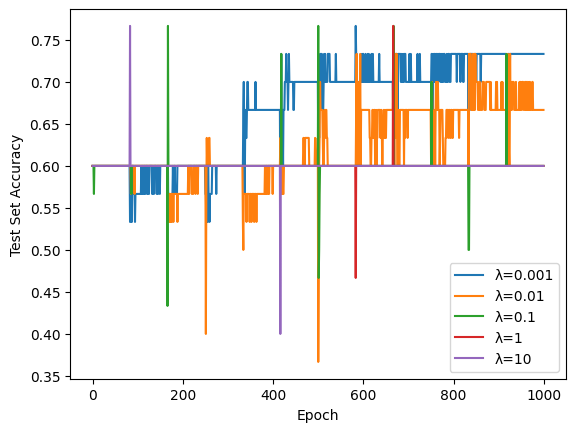

Lambda	Train Accuracy	Test Accuracy
0.001	0.7416666666666667	0.7
0.01	0.675	0.6
0.1	0.6833333333333333	0.6
1	0.6833333333333333	0.6
10	0.6833333333333333	0.6
Final Train Accuracy: 0.6833333333333333
Final Test Accuracy: 0.6


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris data from scikit-learn package
iris = load_iris()

# Check the shape of iris data
print(iris.data.shape)
A = iris.data

# Check the shape of iris target
print(iris.target.shape)

# How many labels does iris data have?
C = len(np.unique(iris.target))
print(f"No. of Classes: {C}")

# Number of data points
n = iris.data.shape[0]

# Dimension of data points
d = iris.data.shape[1]

# Create a nx1 vector of target labels
y = 1.0 * np.ones([A.shape[0],])
for i in range(iris.target.shape[0]):
    if iris.target[i] != 1:
        y[i] = -1

# Create an index array
indexarr = np.arange(n)
np.random.shuffle(indexarr)

# Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_size = int(0.8 * n)
train_indices = indexarr[:train_size]
test_indices = indexarr[train_size:]

train_data = A[train_indices]
train_label = y[train_indices]
test_data = A[test_indices]
test_label = y[test_indices]

# Loss function Lh (hinge loss)
def Lh(w, x, y):
    return max(0, 1 - y * np.dot(w, x))

# Compute the objective function value
def compute_objective(data, labels, w, lambda_reg):
    loss = np.sum([Lh(w, data[i], labels[i]) for i in range(data.shape[0])])
    return loss + (lambda_reg / 2) * np.linalg.norm(w) ** 2

# Compute the gradient of fi(w)
def compute_gradient(w, x, y, lambda_reg):
    if 1 - y * np.dot(w, x) > 0:
        return -y * x + lambda_reg * w
    else:
        return lambda_reg * w

# Prediction function
def predict(w, x):
    return np.sign(np.dot(x, w))

# Compute accuracy function
def compute_accuracy(data, labels, model_w):
    predictions = predict(model_w, data)
    accuracy = np.mean(predictions == labels)
    return accuracy

# Optimization algorithm
def OPT1(data, label, lambda_reg, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    objective_values = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        np.random.shuffle(arr)  # Shuffle every epoch
        for i in np.nditer(arr):  # Pass through the data points
            step = 1 / t
            grad = compute_gradient(w, data[i], label[i], lambda_reg)
            w = w - step * grad
            t += 1
            if t > 1e4:
                t = 1
        
        # Compute objective value and accuracies
        objective_values.append(compute_objective(data, label, w, lambda_reg))
        train_accuracies.append(compute_accuracy(data, label, w))
        test_accuracies.append(compute_accuracy(test_data, test_label, w))
    
    return w, objective_values, train_accuracies, test_accuracies

# Experiment with different lambda values
lambdas = [1e-3, 1e-2, 0.1, 1, 10]
num_epochs = 1000

for lambda_reg in lambdas:
    w, objective_values, train_accuracies, test_accuracies = OPT1(train_data, train_label, lambda_reg, num_epochs)
    
    plt.figure(1)
    plt.plot(objective_values, label=f'λ={lambda_reg}')
    plt.xlabel('Epoch')
    plt.ylabel('Objective Function Value')
    plt.legend()
    
    plt.figure(2)
    plt.plot(train_accuracies, label=f'λ={lambda_reg}')
    plt.xlabel('Epoch')
    plt.ylabel('Train Set Accuracy')
    plt.legend()
    
    plt.figure(3)
    plt.plot(test_accuracies, label=f'λ={lambda_reg}')
    plt.xlabel('Epoch')
    plt.ylabel('Test Set Accuracy')
    plt.legend()

plt.show()

# Tabulate final accuracies
print("Lambda\tTrain Accuracy\tTest Accuracy")
for lambda_reg in lambdas:
    w, _, train_accuracies, test_accuracies = OPT1(train_data, train_label, lambda_reg, num_epochs)
    print(f"{lambda_reg}\t{train_accuracies[-1]}\t{test_accuracies[-1]}")

# Implement a stopping criterion based on the change in objective function value
def OPT1_with_stopping(data, label, lambda_reg, tol=1e-4, max_epochs=1000):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    prev_objective = float('inf')
    
    for epoch in range(max_epochs):
        np.random.shuffle(arr)  # Shuffle every epoch
        for i in np.nditer(arr):  # Pass through the data points
            step = 1 / t
            grad = compute_gradient(w, data[i], label[i], lambda_reg)
            w = w - step * grad
            t += 1
            if t > 1e4:
                t = 1
        
        # Compute objective value
        current_objective = compute_objective(data, label, w, lambda_reg)
        if abs(prev_objective - current_objective) < tol:
            break
        prev_objective = current_objective
    
    return w

# Use the best lambda value from previous experiments
best_lambda = 0.1
w = OPT1_with_stopping(train_data, train_label, best_lambda)

# Compute final accuracies
final_train_accuracy = compute_accuracy(train_data, train_label, w)
final_test_accuracy = compute_accuracy(test_data, test_label, w)

print(f"Final Train Accuracy: {final_train_accuracy}")
print(f"Final Test Accuracy: {final_test_accuracy}")